<a href="https://colab.research.google.com/github/Vivii223/Data-Science-Notes/blob/master/Seminar_NLP_shap%26lime_Xinwei_Li.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Explainability Methods for Legal Judgment Prediction in Switzerland**

University of Bern

Xinwei Li(21-117-007)


# **1.Introduction**

# **2.Literature Review**

My study reviews the current state of research on interpretable models, the application of interpretable models to legal judgments, and the relevant literature on the SHAP and LIME models. The literature is reviewed from both theoretical and empirical perspectives in the literature review is conducted.

***2.1 The current research on interpretable models***

Deep learning has been applied directly to the research process as a 'black box', when there is no reasonable explanation neither for results nor how to determine the best parameters to use. There are currently two main areas of research on interpretability: 

Firstly, the deep learning model itself is studied by adjusting the internal parameters of the model and analysing the results obtained from the system to determine the impact of the parameters on the results. By adding perturbations to the input variables and probing the representation vector to assess the importance of the different variables in the system, the basis for the decisions made by the system is inferred. Secondly, it is straightforward to construct models that are inherently interpretable, only in learning more structured and interpretable models.

Ribeiro (1998) proposes a locally understandable model-independent interpretation technique (LIME), which first obtains feedback data on the response of a deep model by detecting input perturbations, he then constructs a local linear model from this data and uses this model as a simplified proxy for a deep model for a particular input value. Riberio(1998) argues that this approach can be useful in identifying the input regions that have the greatest impact on decisions for various types of models and problem domains.Ribeiro,Singh&Guestrin(2016) research problem of interpretable interpreters.The definition of interpretation given by Montavon (2017), denotes the mapping of abstract concepts into a human-understandable domain.Lipton (2018) first analyzed the interpretation of interpretability in deep learning models from four perspectives, such as trustworthiness, causal relevance, and information availability The first analysis of the meaning of interpretability in deep learning models from four perspectives, including trustworthiness, causal correlation, and information availability, pointed out that "decisions made by interpretable deep learning models tend to gain higher trust, even when the trained model diverges from the actual situation; interpretability can help humans understand the characteristics of deep learning systems and infer the relationships of variables within the system; it can help deep learning models easily cope with the inconsistency of sample distribution It can help deep learning models to cope with the inconsistency of sample distribution and migratory learning; interpretability can provide people with auxiliary information, even if it does not clarify the inner workings of the model, interpretability can also provide decision makers with a basis for judgment. Cheng et al.(2020) reviewed the history of deep learning interpretability research from three aspects: the origin of deep learning interpretability research, the research exploration period and the model building period. The research on interpretable deep learning model construction was dissected from four aspects: model agents, logical inference, network node association analysis, and improvement of traditional machine learning models.

***2.2 Applications of interpretable models***

In recent years, the use of natural language processing for the prediction of legal decisions has become an important direction of research method. Amir (2019) used the XGBoost method to predict accident rates for the Chicago Metropolitan Expressway and used SHAP to interpret the results and analyse the importance of individual features. Mangalath (2020) used an experimental database to predict the failure patterns of reinforced concrete columns and shear strength modes, and he used the SHAP method to rank the input variables to identify failure modes. Yin et al. (2021) argue that there is a long history of research in legal decision prediction, with early work focusing on analysing legal cases in specific scenarios using mathematical and statistical computational methods. And while machine learning methods have been increasingly applied in this area in recent years with the rapid development of artificial intelligence technology, their models are not more explicit in predicting outcome interpretations. This has prompted existing lawful judgment expectations, albeit profoundly precise, being not able to give sensible illustrative notes on the purposes behind the forecast results. They likewise need without a hypothetical help reason for direction.


***2.3 Review of the literature***
According to previous studies, the construction of interpretable models has important theoretical significance and practical needs. Through interpretable analysis, researchers can clearly know the feature engineering and understand the core functions of machine learning models more.It permits users to know obviously the way of behaving and limits of the framework ,and to see plainly the intelligent thinking behind every choice. Involving legitimate decisions for instance, we concentrate on the issue of deficient thinking in expectation results and give an examination of the impacts on the aftereffects of non-judgment expectations. Based on the research objectives, the following research question was asked.

**RQ1: Can we find the models relying on spurious correlations, rather than on sensible content, to make the decisions?**

**RQ2: What insight on the prediction of the legal judgment outcome can we draw using the explanations?**

# **3.Data Discription**
We recently presented a dataset for legal judgment prediction including 85k Swiss Federal Supreme Court decisions. Although we achieved up to 70% Macro- F1 Score, the models still work as black boxes and are thus not interpretable.

# Load packges

In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Tue Jun 14 10:35:51 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
 pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 564 kB 5.3 MB/s 


In [4]:
pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 275 kB 5.3 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=0ca691b82ee43385eb82a2aefea50caa9843cd61b380df3f514727564932d4e0
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [5]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
import shap
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
import numpy as np
import os, tqdm, json

shap.initjs()

# **Load dataset**

In [1]:
label2id = {
    "approval": 0,
    "dismissal": 1
}

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
pwd

'/content'

In [8]:
data_dict= {}
splits = ["train", "val", "test"]
for split in splits:
    data_dict[split] = pd.read_csv(f"./fr/{split}.csv")
    data_dict[split]["label"] = data_dict[split]["label"].map(label2id)

In [9]:
text_dict = {}
target_dict = {}
for split in splits:
    text_dict[split] = data_dict[split]["text"].values
    target_dict[split] = data_dict[split]["label"].values

In [10]:
target_dict["train"]

array([1, 0, 0, ..., 1, 1, 0])

# **Train model**


In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
stop_words = stopwords.words('french')

In [13]:
#vectorizer = CountVectorizer(stop_words=stop_words, ngram_range=(1, 3))
vectorizer = TfidfVectorizer(stop_words=stop_words)
X_train = vectorizer.fit_transform(text_dict["train"]).toarray() # sparse also works but Explanation slicing is not yet supported
X_val = vectorizer.transform(text_dict["val"]).toarray()
X_test = vectorizer.transform(text_dict["test"]).toarray()

In [14]:
y_train = target_dict["train"]
y_val = target_dict["val"]
y_test = target_dict["test"]

In [15]:
seed = 42
model = sklearn.linear_model.LogisticRegression(penalty="l2", C=0.1)
#model = sklearn.linear_model.SGDClassifier(early_stopping=True, learning_rate='adaptive',
#                                             eta0=1e-4, validation_fraction=0.1, max_iter=10000,
#                                            class_weight='balanced', random_state=seed)
model.fit(X_train, y_train)

LogisticRegression(C=0.1)

# **4.Model 1 : SHAP**
Shap was proposed by Professor Loyd Shapley to solve the problem of contribution and benefit distribution in cooperative games. The method is a post-hoc interpretation of the model, in which the core of the interpretation is to calculate the Shap Value of each of the characteristic variables. N-person cooperation in which individual members contribute should also have different benefit distributions. Often, getting the trade-off between accuracy and interpretability right can be a difficult balancing act, but SHAP value can provide both. The impact of having a particular value for a given characteristic is explained and compared with the predictions we would have made if that characteristic had some baseline value. From another perspective, the SHAP value is the value assigned to each feature through that sample. to get the optimal prediction model and the optimal set of indicators it requires to explore the impact of each feature on the outcome.To calculate the Shapley value, it is important to consider whether each feature is in the set S. As the number of features increases, the computational complexity increases , so an approximation algorithm implemented by Monte-Carlo sampling was proposed by Strumbelj et al.
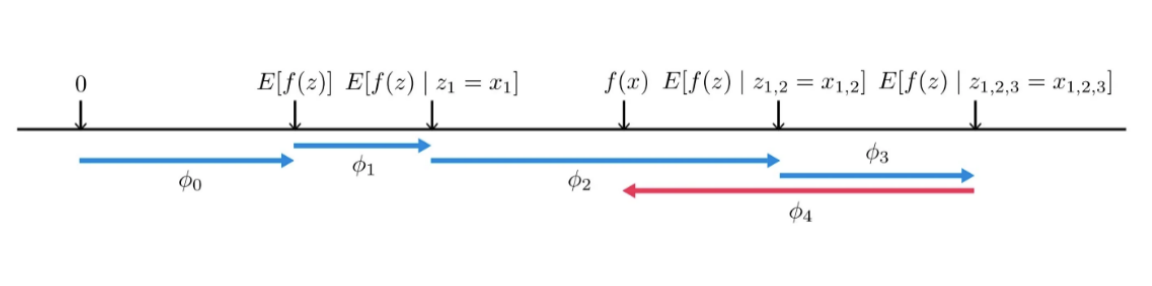

Input: number of iterations M, sample points x, feature index, training data, training model;

Output: Shapley value of the nth feature;

Step1: Random sampling from the training data;

Step2: Randomly replace the features in sample x with those in z to get two new vectors;

Step 3: Calculate the marginal returns for each time and average them to get the Shapley value of the feature.

The dataset (with M characteristic variables and n samples), the original model f, and all predicted values of the original model f on the dataset are known. g is the model used in SHAP to explain f.

The figure above explains the reasons for the differences between the sample predictions and the sample means. Where the blue arrow indicates a positive SHAP value, meaning that the characteristic variable has a positive effect on the predicted value of the original model. The red arrow indicates a negative SHAP value, meaning that the eigenvariable has a negative effect on the predicted value of the original model. The presence of Z4 has a negative effect on f(x). The combined effect of the four characteristic variables of this sample X brought the original model prediction of this sample x from the mean to f(x).

In [16]:
explainer = shap.Explainer(model, X_train, feature_names=vectorizer.get_feature_names())
shap_values = explainer(X_test)

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


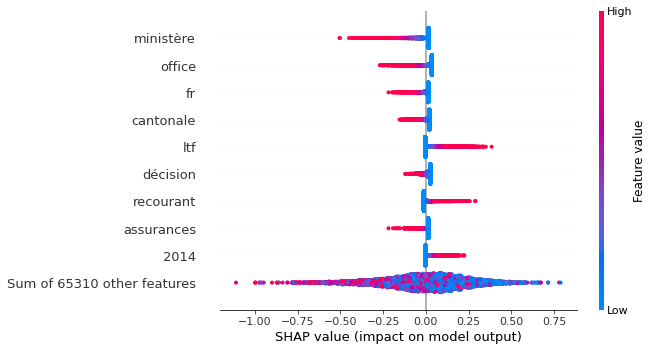

In [17]:
shap.plots.beeswarm(shap_values)

In [18]:
ind = 0 # index of the test sample
shap.plots.force(shap_values[ind])

In [19]:
ind = 1 # index of the test sample
shap.plots.force(shap_values[ind])

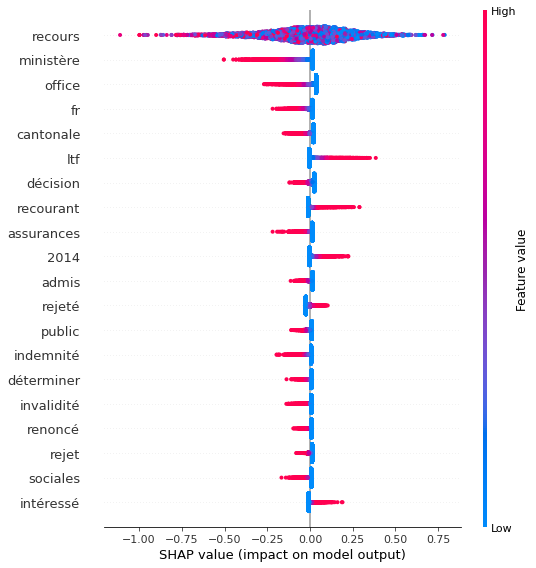

In [20]:
shap.summary_plot(shap_values)

# 5.Model 2: LIME
Local Interpretable Model-Agnostic Explanation (LIME) is an interpretable model based on a model agent, i.e.: a simple model is used to interpret a complex model. The predictions of the model are interpreted by perturbing the input samples. The analytical idea of the model is illustrated in the following diagram.

The specific analysis steps of the LIME model are as follows.

Step 1:Training on the entire data;

Step 2:Select a sample with interpretable N perturbations to generate a local sample;

Step 3:Define a function for the similarity measure and select the k features that best describe the output of the complex model;

Step 4: Use the complex model to predict them;

Step 5: Fit a simple model to the sampled samples to obtain the weights of the model.

In [21]:
from lime import lime_text
explainer = lime_text.LimeTextExplainer(class_names=["approval", "dismissal"])


# print("Question: \n", val_df["question_text"][idx])
# print("Probability (Insincere) =", c.predict_proba([val_df["question_text"][idx]])[0, 1])
# print("Probability (Sincere) =", c.predict_proba([val_df["question_text"][idx]])[0, 0])
# print("True Class is:", class_names[val_df["target"][idx]])

In [24]:
#weights = {0: weights}
from sklearn.pipeline import Pipeline, make_pipeline
pipeline = make_pipeline(vectorizer, model)

In [25]:
idx= 0 
exp = explainer.explain_instance(text_dict["test"][0], pipeline.predict_proba, num_features = 10, top_labels=2)

In [26]:
exp.as_list(label=1)

[('Fondation', -0.03763943680848953),
 ('fondation', -0.03309152272301504),
 ('fr', -0.014799521297092886),
 ('2008', 0.013097728338323273),
 ('Sàrl', 0.010312740337403757),
 ('contrat', 0.0067169462587525946),
 ('dispositif', -0.0031840084532425944),
 ('salaire', -0.0026986884250304634),
 ('travail', -0.0016927636350414976),
 ('honoraires', -0.0007668849590715892)]

In [27]:
exp.as_list(label=0)

[('Fondation', 0.03763943680848954),
 ('fondation', 0.03309152272301504),
 ('fr', 0.014799521297092885),
 ('2008', -0.013097728338323273),
 ('Sàrl', -0.010312740337403764),
 ('contrat', -0.006716946258752596),
 ('dispositif', 0.003184008453242598),
 ('salaire', 0.0026986884250304664),
 ('travail', 0.0016927636350414995),
 ('honoraires', 0.0007668849590715892)]

In [28]:
exp.show_in_notebook()